In [24]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from pairwise.src.pairwise_fitter import Pairwise_fitter
from pairwise.src.pairwise_evaluator import Pairwise_evaluator
import importlib
import src.paper_utils as utils
import src.plot as myplot
import pairwise.src.pairwise_utils as pwutils
import networkx as nx

In [30]:
importlib.reload(myplot)
importlib.reload(utils)
importlib.reload(pwutils)

<module 'pairwise.src.pairwise_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots_pw/../../pairwise/src/pairwise_utils.py'>

In [60]:
nspin = 121

path = "../data/INPUT_all/data/train-images-unlabeled-{}.dat"

sample_size = 4000
traindatas = [np.genfromtxt(path.format(digit), dtype=int, delimiter=1) for digit in range(10)]

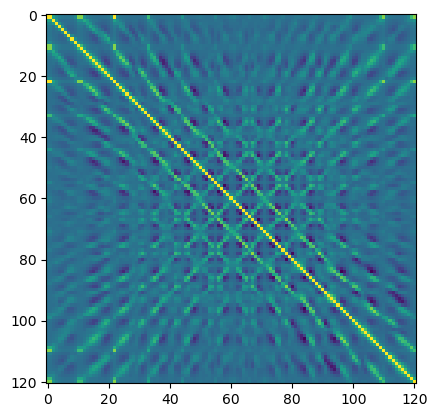

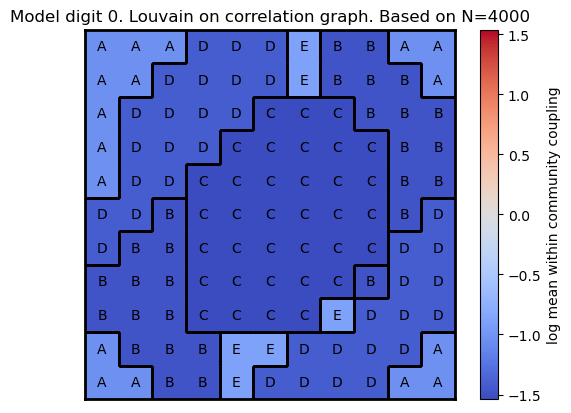

In [62]:
correl = np.corrcoef(traindatas[0][-sample_size:].T)
plt.imshow(correl)
plt.figure()
G = nx.from_numpy_array(correl)

pmap,lcom = utils.cluster_partmap(G,42,return_lcom=True)
lcomm_w = np.array([utils.community_avgJij(G, com) for com in lcom])
lcomm_w_log = np.where(np.array(lcomm_w) != 0, np.log(np.array(lcomm_w)), 0)


plt.title(f"Model digit {0}. Louvain on correlation graph. Based on N={sample_size}")
im = myplot.partition_map(plt.gca(),np.array(lcomm_w_log)[pmap],myplot.int_to_letters(pmap),myplot.find_borders(pmap),cbar=None)
colorbar = plt.colorbar(im,label="log mean within community coupling")